In [42]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

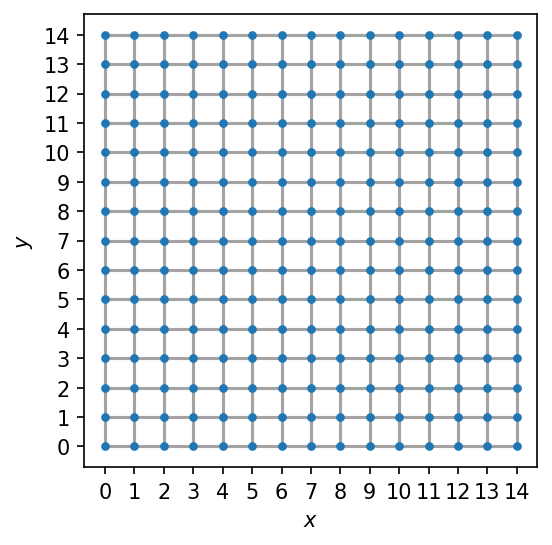

In [43]:
N = 15
lattice = SquareLattice(N, "open")

lattice.plot()
num_sites = lattice.get_num_sites()

lattice_sites = lattice.get_sites()
lattice_bonds = lattice.get_bonds()

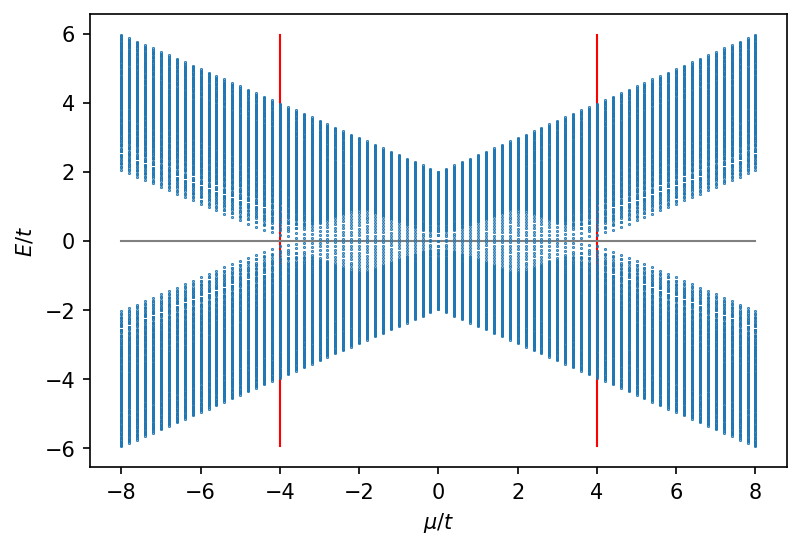

In [44]:
t = 1.0
delta = complex(t, 0.0)
num_vals = 81
mu_values = np.linspace(-8.0, 8.0, num_vals)
energies_mu = []

for mu in mu_values:
    Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
    H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
    energies, states = scipy.linalg.eigh(H_direct_lattice)

    for energy in energies:
        energies_mu.append((mu, energy))

# plt.grid(linestyle=":", zorder=0)
energy_vals = [elem[1] for elem in energies_mu]
plt.xlabel("$\mu/t$")
plt.ylabel("$E/t$")
plt.plot(mu_values, [0.0 for i in range(len(mu_values))], color='gray', linestyle="-", linewidth=1.0, zorder=10)
plt.plot([-4 for i in range(num_vals)], np.linspace(min(energy_vals), max(energy_vals), num_vals), linestyle='-', linewidth=1.0, color="r")
plt.plot([+4 for i in range(num_vals)], np.linspace(min(energy_vals), max(energy_vals), num_vals), linestyle='-', linewidth=1.0, color="r")
# plt.plot()
plt.scatter([elem[0] for elem in energies_mu], [elem[1] for elem in energies_mu], s=0.1, zorder=100)
plt.savefig("./plots/majorana_modes_square_lattice.svg")